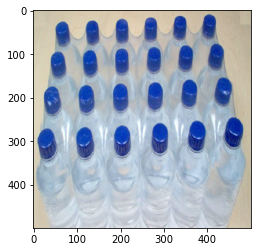

In [60]:
import numpy as np
from PIL import Image
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt
%matplotlib inline

photo = Image.open('123.jpg')
photo = photo.convert(mode='RGB')
plt.imshow(photo)

width,height  = photo.size
threshold = 100

red_map = np.zeros((height, width, 3), dtype="uint8")
red_map.fill(255)

grn_map = np.zeros((height, width, 3), dtype="uint8")
grn_map.fill(255)

blu_map = np.zeros((height, width, 3), dtype="uint8")
blu_map.fill(255)

In [61]:
def red_color():
    for y in range(0, height):
        for x in range(0, width):
            r,g,b = photo.getpixel((x,y))
            if r > g & b < threshold:
                red_map[y,x] = (r,0,0)
    return red_map

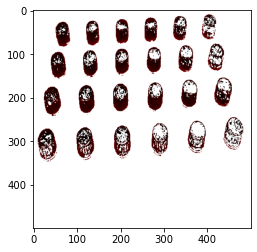

In [62]:
red_img = red_color()
plt.imshow(red_img)
#red_img= Image.fromarray(red_img)
#red_img.save('00.jpg')

In [63]:
def grn_color():
    for y in range(0, height):
        for x in range(0, width):
            r,g,b = photo.getpixel((x,y))
            if g > r & b < threshold:
                grn_map[y,x] = (0,g,0)
    return grn_map

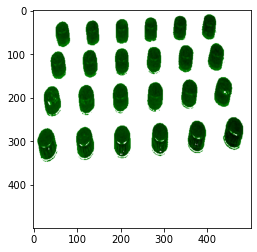

In [64]:
grn_img = grn_color()
plt.imshow(grn_img)

In [65]:
def blu_color():
    for y in range(0, height):
        for x in range(0, width):
            r,g,b = photo.getpixel((x,y))
            if b > r & g < threshold :
                blu_map[y,x] = (0,0,b)
    return blu_map

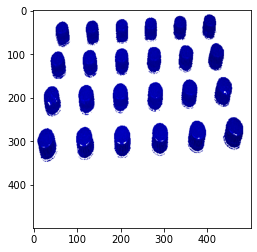

In [66]:
blu_img = blu_color()
plt.imshow(blu_img)

In [67]:
def count_dot(image_file):
    image= np.array(image_file)
    blurred_image = filters.gaussian(image, sigma=1.0)
    mask = blurred_image < 0.02
    mask = morphology.remove_small_objects(mask,500)
    mask = morphology.remove_small_holes(mask,500)
    labeled_image, count = measure.label(mask, return_num=True)
    
    return labeled_image, count

In [69]:
labeled_image, red_count = count_dot(red_img)
labeled_image, grn_count = count_dot(grn_img)
labeled_image, blu_count = count_dot(blu_img)

#print(f"this is number {red_count} face")
# print(f"this is number {grn_count} face")
print(f"there is {blu_count} bottle")

there is 24 bottle
